In [ ]:
# Importando librerías y datos
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Iris.csv')

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = pd.DataFrame()
X.loc[:,0] = df.loc[:,"SepalLengthCm"]
X.loc[:,1] = df.loc[:,"PetalLengthCm"]

cls = KMeans(init="k-means++", n_clusters=3, n_init = 10)
cls.fit(X)

X["predicted_label"] = cls.labels_.astype(int)
X.columns = ["SepalLengthCm","PetalLengthCm","label"]
X

,SepalLengthCm,PetalLengthCm,label
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
3,4.6,1.5,1
4,5.0,1.4,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,0
147,6.5,5.2,2
148,6.2,5.4,2


[[5.87413793 4.39310345]
 [5.00784314 1.49411765]
 [6.83902439 5.67804878]]


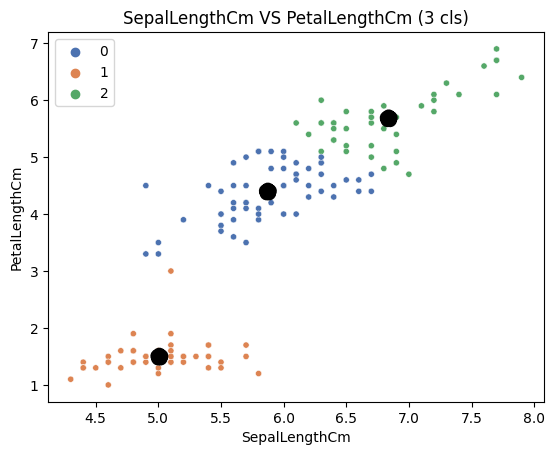

In [ ]:
centroids = cls.cluster_centers_
labels = cls.labels_
print(centroids)

centroids_x = centroids[:,1]
centroids_y = centroids[:,0]

sns.scatterplot(x="SepalLengthCm",y="PetalLengthCm", hue="label",
                data=X, palette = "deep", s=20)
plt.legend(loc="upper left")
plt.title("SepalLengthCm VS PetalLengthCm (3 cls)")
plt.scatter(centroids_y,centroids_x, marker = "*", s=10, linewidths = 10, zorder = 10, c=["black","black","black"])